In [4]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data

df = pd.read_csv(r'C:\Users\Mohnish\Documents\Portfolio Projects Data\movies.csv')

In [16]:
# Now let's take a look at the data

df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country       budget        gross  \
0     United Kingdom   19000000.0   46998772.0   
1      United States    4500000.0   58853106.0   
2      United States   18000000.0  538375067.0   
3      United States    3500000.0   83453539.0   
4      United States    6000000.0   39846344.0   
...              ...          ...          ...   
7648   United States   90000000.0  426505244.0   
7649   United States   85000000.0  319715683.0   
7650   United States  175000000.0  245487753.0   
7651          Canada  135000000.0  111105497.0   
7652           China   80000000.0  461421559.0   

                                  company  runtime  yearcorrect  
0                            Warner Bros.    146.0         1980  
1                       Columbia Pictures    104.0         1980  
2                               Lucasfilm    124.0         1980  
3                      Paramount Pictures     88.0         1980  
4                          Orion Pictures     98.0         1980  
...                                   ...      ...          ...  
7648                    Columbia Pictures    124.0         2020  
7649                   Paramount Pictures     99.0         2020  
7650                   Universal Pictures    101.0         2020  
7651                 20th Century Studios    100.0         2020  
7652  Beijing Diqi Yinxiang Entertainment    149.0         2020  

[5421 rows x 16 columns]

In [17]:
# We need to see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
# Deleting Null values

df = df.dropna()

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
yearcorrect - 0%


In [18]:
# Data Types for our columns

print(df.dtypes)

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object


In [15]:
# Create correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [20]:
df.drop_duplicates()

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country       budget        gross  \
0     United Kingdom   19000000.0   46998772.0   
1      United States    4500000.0   58853106.0   
2      United States   18000000.0  538375067.0   
3      United States    3500000.0   83453539.0   
4      United States    6000000.0   39846344.0   
...              ...          ...          ...   
7648   United States   90000000.0  426505244.0   
7649   United States   85000000.0  319715683.0   
7650   United States  175000000.0  245487753.0   
7651          Canada  135000000.0  111105497.0   
7652           China   80000000.0  461421559.0   

                                  company  runtime  yearcorrect  
0                            Warner Bros.    146.0         1980  
1                       Columbia Pictures    104.0         1980  
2                               Lucasfilm    124.0         1980  
3                      Paramount Pictures     88.0         1980  
4                          Orion Pictures     98.0         1980  
...                                   ...      ...          ...  
7648                    Columbia Pictures    124.0         2020  
7649                   Paramount Pictures     99.0         2020  
7650                   Universal Pictures    101.0         2020  
7651                 20th Century Studios    100.0         2020  
7652  Beijing Diqi Yinxiang Entertainment    149.0         2020  

[5421 rows x 16 columns]

In [54]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

<AxesSubplot:>

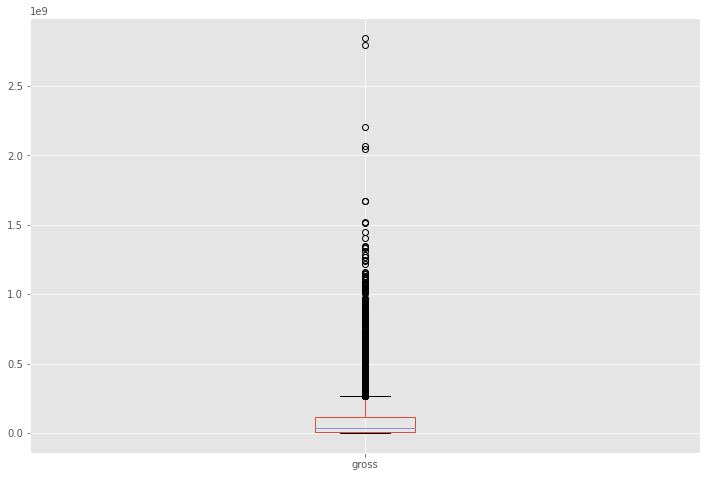

In [38]:
# Are there any Outliers?

df.boxplot(column=['gross'])

<function matplotlib.pyplot.show(close=None, block=None)>

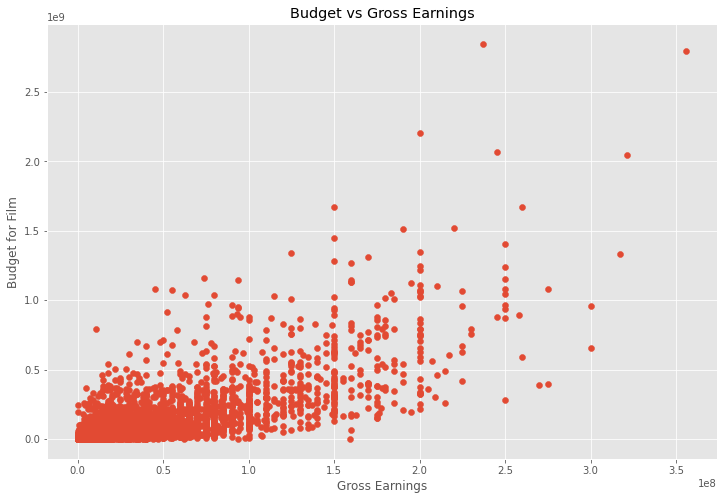

In [25]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show

<AxesSubplot:xlabel='gross', ylabel='budget'>

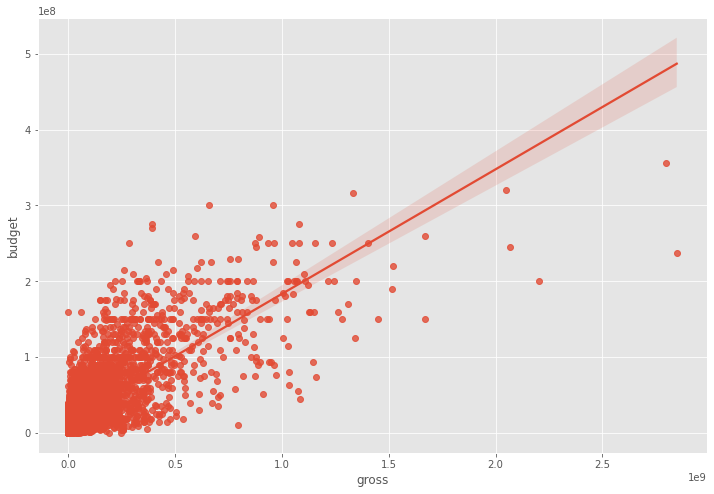

In [26]:
# Plot Budget vs Gross using seaborn

sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

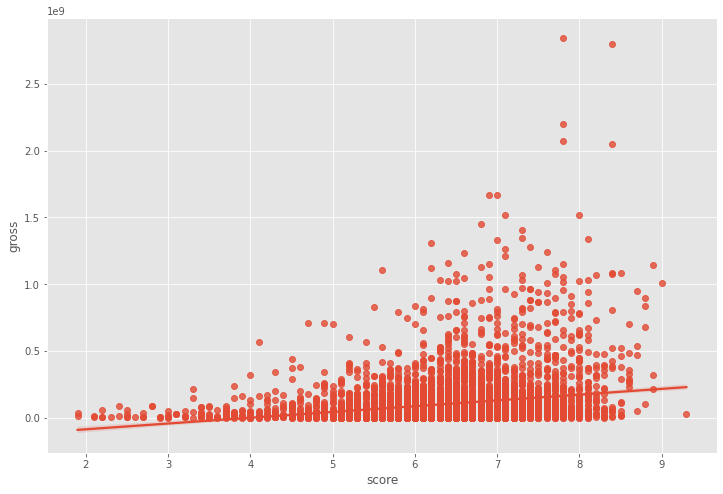

In [28]:
# Scatter plot with score vs gross

sns.regplot(x="score", y="gross", data=df)

In [29]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

In [30]:
df.corr(method ='kendall')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.039389  0.296512  0.220833  0.239539  0.064824   
score        0.039389  1.000000  0.350185 -0.006406  0.124943  0.292254   
votes        0.296512  0.350185  1.000000  0.346274  0.553625  0.205344   
budget       0.220833 -0.006406  0.346274  1.000000  0.512057  0.231278   
gross        0.239539  0.124943  0.553625  0.512057  1.000000  0.176979   
runtime      0.064824  0.292254  0.205344  0.231278  0.176979  1.000000   
yearcorrect  0.991304  0.043400  0.293044  0.213719  0.232372  0.064793   

             yearcorrect  
year            0.991304  
score           0.043400  
votes           0.293044  
budget          0.213719  
gross           0.232372  
runtime         0.064793  
yearcorrect     1.000000

In [31]:
df.corr(method ='spearman')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.057741  0.427623  0.312886  0.351045  0.095444   
score        0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155   
votes        0.427623  0.495409  1.000000  0.493461  0.745793  0.300621   
budget       0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794   
gross        0.351045  0.183192  0.745793  0.692958  1.000000  0.257400   
runtime      0.095444  0.412155  0.300621  0.330794  0.257400  1.000000   
yearcorrect  0.998694  0.063674  0.422988  0.302535  0.340529  0.095507   

             yearcorrect  
year            0.998694  
score           0.063674  
votes           0.422988  
budget          0.302535  
gross           0.340529  
runtime         0.095507  
yearcorrect     1.000000

In [ ]:
# High correlation between budget and gross

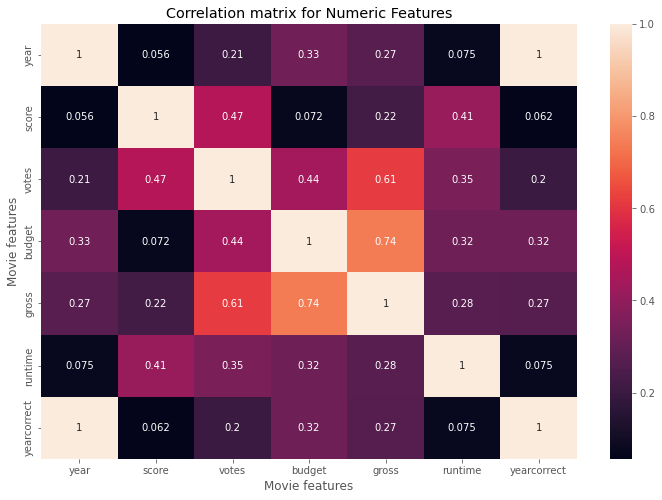

In [32]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [33]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name         1.000000  0.169808  0.028413  0.965461  0.966086 -0.020083   
rating       0.169808  1.000000 -0.116507  0.179456  0.171063  0.036114   
genre        0.028413 -0.116507  1.000000  0.031765  0.031251 -0.027402   
year         0.965461  0.179456  0.031765  1.000000  0.996490 -0.014594   
released     0.966086  0.171063  0.031251  0.996490  1.000000 -0.019486   
score       -0.020083  0.036114 -0.027402 -0.014594 -0.019486  1.000000   
votes        0.297305  0.097619 -0.009983  0.323916  0.313254 -0.041981   
director     0.725411  0.096014  0.036671  0.747785  0.750825 -0.006583   
writer       0.791872  0.128909  0.033975  0.812386  0.809858 -0.021538   
star         0.695124  0.115694  0.045497  0.719373  0.720076  0.015108   
country      0.098110 -0.004547 -0.003314  0.095073  0.096807  0.016567   
budget       0.288955  0.203698  0.020893  0.319135  0.309616 -0.005493   
gross        0.967925  0.172703  0.032033  0.996371  0.998490 -0.015744   
company      0.535369 -0.026286  0.015127  0.537731  0.546033 -0.008555   
runtime      0.048980  0.032265  0.000056  0.055864  0.049650  0.011831   
yearcorrect  0.921688  0.169681  0.031669  0.950610  0.945065 -0.012946   

                votes  director    writer      star   country    budget  \
name         0.297305  0.725411  0.791872  0.695124  0.098110  0.288955   
rating       0.097619  0.096014  0.128909  0.115694 -0.004547  0.203698   
genre       -0.009983  0.036671  0.033975  0.045497 -0.003314  0.020893   
year         0.323916  0.747785  0.812386  0.719373  0.095073  0.319135   
released     0.313254  0.750825  0.809858  0.720076  0.096807  0.309616   
score       -0.041981 -0.006583 -0.021538  0.015108  0.016567 -0.005493   
votes        1.000000  0.187909  0.225105  0.182043 -0.021562  0.359065   
director     0.187909  1.000000  0.717990  0.636705  0.095349  0.124051   
writer       0.225105  0.717990  1.000000  0.626647  0.098623  0.208088   
star         0.182043  0.636705  0.626647  1.000000  0.098071  0.138015   
country     -0.021562  0.095349  0.098623  0.098071  1.000000  0.016348   
budget       0.359065  0.124051  0.208088  0.138015  0.016348  1.000000   
gross        0.307248  0.751737  0.811356  0.720811  0.094820  0.305284   
company      0.007423  0.483737  0.477503  0.442307  0.153912 -0.053573   
runtime      0.126362 -0.026918  0.023123  0.033297  0.040813  0.134894   
yearcorrect  0.316065  0.708189  0.779672  0.684736  0.088955  0.303136   

                gross   company   runtime  yearcorrect  
name         0.967925  0.535369  0.048980     0.921688  
rating       0.172703 -0.026286  0.032265     0.169681  
genre        0.032033  0.015127  0.000056     0.031669  
year         0.996371  0.537731  0.055864     0.950610  
released     0.998490  0.546033  0.049650     0.945065  
score       -0.015744 -0.008555  0.011831    -0.012946  
votes        0.307248  0.007423  0.126362     0.316065  
director     0.751737  0.483737 -0.026918     0.708189  
writer       0.811356  0.477503  0.023123     0.779672  
star         0.720811  0.442307  0.033297     0.684736  
country      0.094820  0.153912  0.040813     0.088955  
budget       0.305284 -0.053573  0.134894     0.303136  
gross        1.000000  0.545924  0.047728     0.945958  
company      0.545924  1.000000 -0.010695     0.506753  
runtime      0.047728 -0.010695  1.000000     0.049194  
yearcorrect  0.945958  0.506753  0.049194     1.000000

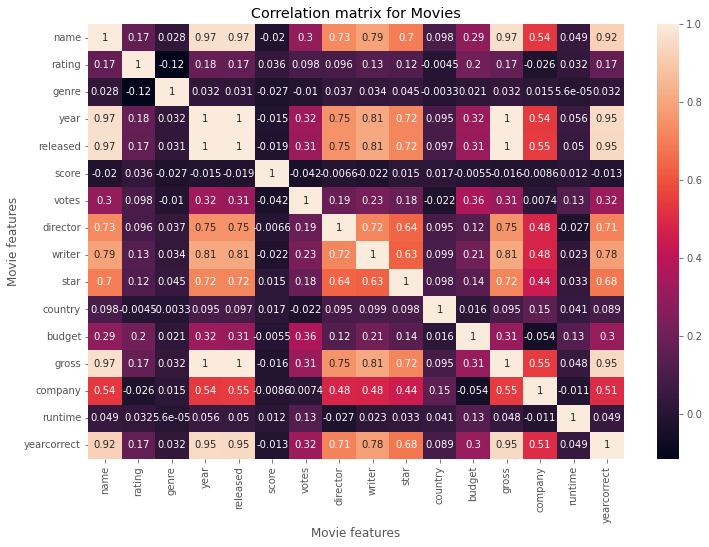

In [34]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [51]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.169808
             genre          0.028413
             year           0.965461
             released       0.966086
             score         -0.020083
             votes          0.297305
             director       0.725411
             writer         0.791872
             star           0.695124
             country        0.098110
             budget         0.288955
             gross          0.967925
             company        0.535369
             runtime        0.048980
             yearcorrect    0.921688
             Year           0.037432
rating       name           0.169808
             rating         1.000000
             genre         -0.116507
             year           0.179456
             released       0.171063
             score          0.036114
             votes          0.097619
             director       0.096014
             writer         0.128909
             star           0.115694
 

In [43]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        rating        -0.116507
rating       genre         -0.116507
budget       company       -0.053573
company      budget        -0.053573
score        votes         -0.041981
votes        score         -0.041981
genre        score         -0.027402
score        genre         -0.027402
director     runtime       -0.026918
runtime      director      -0.026918
rating       company       -0.026286
company      rating        -0.026286
country      votes         -0.021562
votes        country       -0.021562
score        writer        -0.021538
writer       score         -0.021538
name         score         -0.020083
score        name          -0.020083
released     score         -0.019486
score        released      -0.019486
             gross         -0.015744
gross        score         -0.015744
score        year          -0.014594
year         score         -0.014594
score        yearcorrect   -0.012946
yearcorrect  score         -0.012946
company      runtime       -0.010695
r

In [44]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

yearcorrect  company        0.506753
company      yearcorrect    0.506753
             name           0.535369
name         company        0.535369
company      year           0.537731
year         company        0.537731
company      gross          0.545924
gross        company        0.545924
released     company        0.546033
company      released       0.546033
star         writer         0.626647
writer       star           0.626647
star         director       0.636705
director     star           0.636705
yearcorrect  star           0.684736
star         yearcorrect    0.684736
             name           0.695124
name         star           0.695124
director     yearcorrect    0.708189
yearcorrect  director       0.708189
writer       director       0.717990
director     writer         0.717990
year         star           0.719373
star         year           0.719373
released     star           0.720076
star         released       0.720076
gross        star           0.720811
s

In [ ]:
# vote and budget have the highest correlation to gross earnings

# company has low correlation

In [45]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [55]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                                            year              
"DIA" Productions GmbH & Co. KG                    2003  4.435093e+07
"Weathering With You" Film Partners                2019  1.934575e+08
.406 Production                                    1996  1.058000e+04
1492 Pictures                                      1996  1.298324e+08
                                                   1999  8.742386e+07
1818 Productions                                   1983  1.223263e+07
19 Entertainment                                   2003  4.928883e+06
1978 Films                                         2017  4.065640e+07
1984 Private Defense Contractors                   2014  5.883438e+07
2 Loop Films                                       2002  2.643490e+05
2.0 Entertainment                                  2019  1.228104e+08
2.4.7. Films                                       2007  2.278398e+07
2003 Productions                                   2004  6.942439e+07
20th Century Studios                               2020  1.111055e+08
21 Laps Entertainment                              2014  4.129632e+07
                                                   2018  4.114238e+07
21st Century Film Corporation                      1990  5.835247e+06
21st Century Films                                 1994  1.702394e+06
25th Hour Productions                              2002  2.393206e+07
26 Films                                           2009  2.045887e+07
2929 Productions                                   2007  7.248490e+06
                                                   2008  2.870518e+07
                                                   2014  5.092129e+06
2DUX²                                              2016  6.781500e+05
                                                   2018  1.977444e+08
3 Arts Entertainment                               1996  6.020933e+07
                                                   1997  7.581243e+07
                                                   2001  7.118650e+07
                                                   2010  6.496260e+05
                                                   2013  3.909596e+06
                                                   2014  1.614593e+08
                                                   2015  3.660674e+07
                                                   2019  2.238656e+07
3 Miles Apart Productions Ltd.                     1999  8.408835e+06
3311 Productions                                   2017  5.042014e+06
360 Pictures                                       2007  9.669758e+06
3Mark Entertainment                                2001  4.760014e+06
4 Kids Entertainment                               1999  1.339493e+08
40 Acres & A Mule Filmworks                        1986  7.137502e+06
                                                   1989  3.729544e+07
                                                   1995  1.540344e+07
                                                   1999  3.457378e+07
                                                   2000  2.772812e+07
                                                   2004  1.526951e+06
4Kids Entertainment                                2007  9.580292e+07
7 Arts International                               1999  2.061280e+05
7 Films Cinéma                                     2000  3.033646e+06
88 Productions                                     1990  1.000597e+07
888 Productions                                    1990  2.019659e+08
900 Films                                          2003  5.141166e+06
98 MPH Productions                                 2002  8.069354e+07
A Band Apart                                       1995  3.734870e+06
                                                   1996  4.962000e+04
                                                   2002  1.494615e+07
A&M Films                                          1984  1.455045e+06
                                                   1988  1.610040e+05
    

In [56]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [57]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

C:\Users\Mohnish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mohnish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mohnish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mohnish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mohnish\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.0% of 

<AxesSubplot:xlabel='rating', ylabel='gross'>

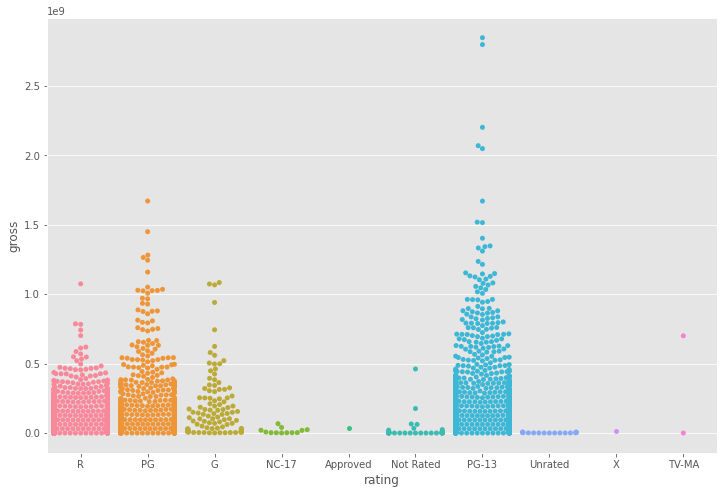

<AxesSubplot:xlabel='rating', ylabel='gross'>

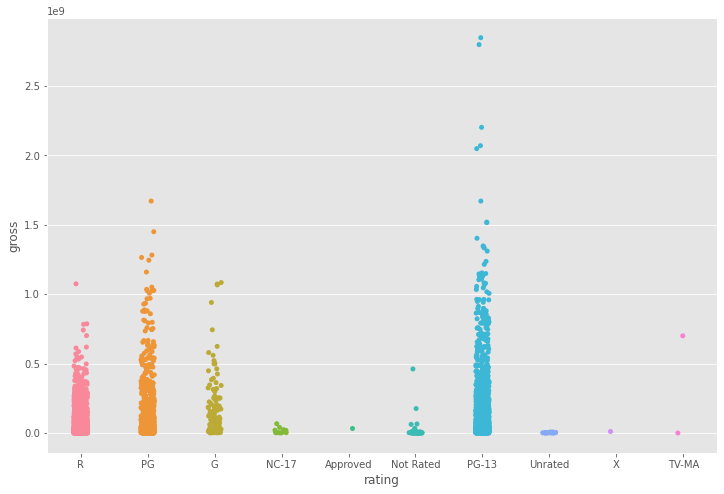